Epoch 1/100
700/700 [==============================] - 0s 365us/step - loss: 0.0059 - acc: 1.0000
Epoch 2/100
700/700 [==============================] - 0s 32us/step - loss: 0.0012 - acc: 1.0000
Epoch 3/100
700/700 [==============================] - 0s 36us/step - loss: 6.8119e-04 - acc: 1.0000
Epoch 4/100
700/700 [==============================] - 0s 33us/step - loss: 5.1432e-04 - acc: 1.0000
Epoch 5/100
700/700 [==============================] - 0s 42us/step - loss: 4.2005e-04 - acc: 1.0000
Epoch 6/100
700/700 [==============================] - 0s 40us/step - loss: 3.5274e-04 - acc: 1.0000
Epoch 7/100
700/700 [==============================] - 0s 39us/step - loss: 2.8880e-04 - acc: 1.0000
Epoch 8/100
700/700 [==============================] - 0s 41us/step - loss: 2.5454e-04 - acc: 1.0000
Epoch 9/100
700/700 [==============================] - 0s 36us/step - loss: 2.2155e-04 - acc: 1.0000
Epoch 10/100
700/700 [==============================] - 0s 38us/step - loss: 1.9777e-04 - acc: 1.0

700/700 [==============================] - 0s 37us/step - loss: 1.0857e-05 - acc: 1.0000
Epoch 82/100
700/700 [==============================] - 0s 33us/step - loss: 1.0649e-05 - acc: 1.0000
Epoch 83/100
700/700 [==============================] - 0s 32us/step - loss: 1.0454e-05 - acc: 1.0000
Epoch 84/100
700/700 [==============================] - 0s 33us/step - loss: 1.0231e-05 - acc: 1.0000
Epoch 85/100
700/700 [==============================] - 0s 35us/step - loss: 1.0012e-05 - acc: 1.0000
Epoch 86/100
700/700 [==============================] - 0s 36us/step - loss: 9.8125e-06 - acc: 1.0000
Epoch 87/100
700/700 [==============================] - 0s 36us/step - loss: 9.6160e-06 - acc: 1.0000
Epoch 88/100
700/700 [==============================] - 0s 34us/step - loss: 9.4283e-06 - acc: 1.0000
Epoch 89/100
700/700 [==============================] - 0s 33us/step - loss: 9.2469e-06 - acc: 1.0000
Epoch 90/100
700/700 [==============================] - 0s 35us/step - loss: 9.0985e-06 - acc: 

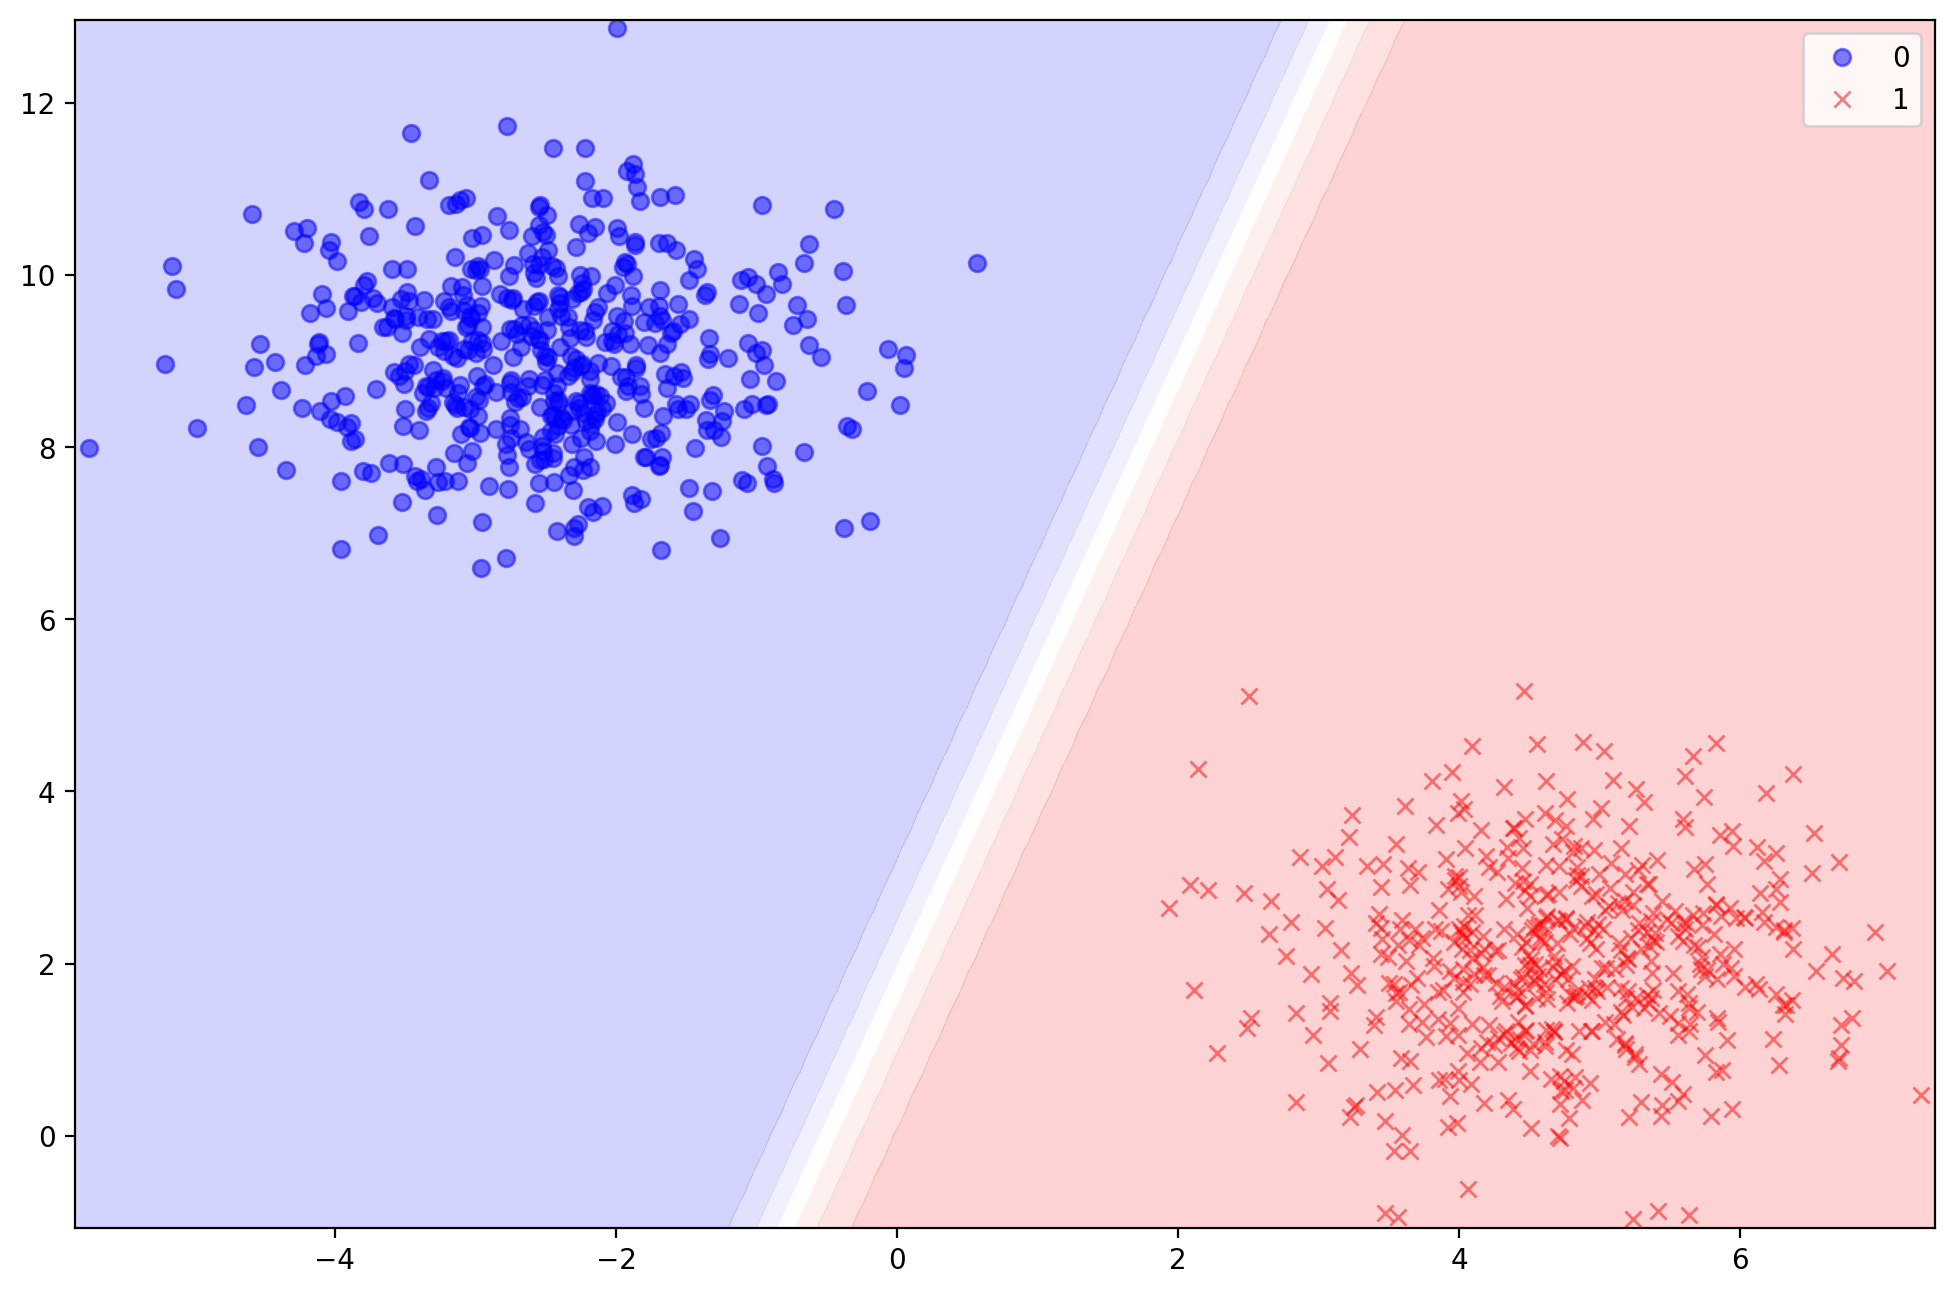

In [7]:
# Defines a network that can find separate data from two blobs of data from different classes

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import matplotlib.pyplot as plt

%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')


plt.rcParams['figure.dpi'] = 100

def plot_data(pl, X, y):
    pl.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    pl.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    pl.legend(['0', '1'])
    return pl


def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    Z = c.reshape(aa.shape)
    
    plt.figure(figsize=(12,8))
    
    plt.contourf(aa, bb, Z, cmap="bwr", alpha=0.2)
    
    plot_data(plt, X, y)
    
    return plt


X, y = make_blobs(n_samples=1000, centers=2, random_state=42)

#plt = plot_data(plt, X, y)
#plt.shoe()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = Sequential()
model.add(Dense(1, input_shape=(2,), activation="sigmoid"))

model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, verbose=1)

eval_result = model.evaluate(X_test, y_test)

print("\n\nTest Loss:" , eval_result[0], "Test accuracy: ", eval_result[1])

plt = plot_decision_boundary(model, X, y)
#plt.show()